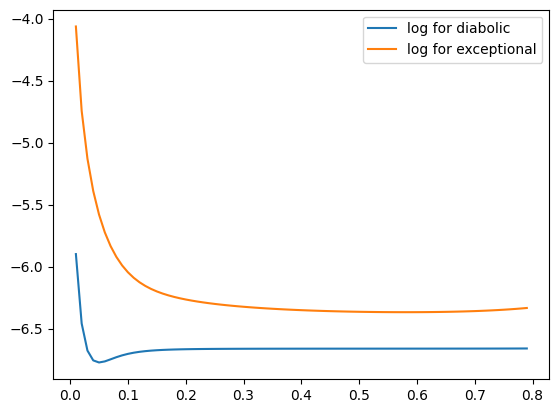

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import cmath
def standard_deviation_A_out(radiative_loss,absorptive_loss,frequency,B_in,g):
    a = complex(absorptive_loss,-2*frequency)
    b = complex(radiative_loss,-2*frequency)
    mean = [0,0]
    cov = [[0.01,0],[0,0.01]]
    #B_out = (B_in*(-1 + ((2*radiative_loss_rate*a)/(a*b + (4*expected_g*expected_g)))))
    #A_out = B_out + complex(noise[0],noise[1])
    i =3000
    repetition =i
    variance = 0
    while i>0:
        noise = np.random.multivariate_normal(mean,cov)
        variance = variance + (abs(complex(noise[0],noise[1])))**2
        i = i-1
    return (variance/repetition)**0.5

def standard_deviation_g(radiative_loss,absorptive_loss,B_in,g,sigma_A_out):
    delta_omega = np.arange(start = -2,stop = 2,step = 0.01)
    input = delta_omega.tolist()
    i=0
    inverse =0
    while i<398:
       a = complex(absorptive_loss,input[i])
       b = complex(radiative_loss,input[i])
       large_term = abs(((((4*g*g)+a*b)**2)/(16*g*radiative_loss*a*B_in)))  
       inverse = inverse + (1/(large_term**2))
       i = i+1
    inverse = 1/(inverse**0.5)
    return sigma_A_out*inverse

g_value = np.arange(start = 0.01,stop = 0.8,step = 0.01)
input = g_value.tolist()
i = 0
sigma_A_out_diabolic = standard_deviation_A_out(0.1,0.1,0,1,0)
sigma_A_out_exceptional = standard_deviation_A_out(1,0.1,0,1,0)
output_ep = []
output_log_dp = []     
output_log_ep = []
output_dp = []
while i<79:
    output_ep.append(standard_deviation_g(1,0.1,1,input[i],sigma_A_out_exceptional))
    output_log_dp.append(cmath.log(standard_deviation_g(0.1,0.1,1,input[i],sigma_A_out_diabolic)))
    output_log_ep.append(cmath.log(standard_deviation_g(1,0.1,1,input[i],sigma_A_out_exceptional)))
    output_dp.append(standard_deviation_g(0.1,0.1,1,input[i],sigma_A_out_diabolic))
    i = i+1

#plt.plot(input,output_ep, label = 'Exceptional')
#plt.plot(input,output_dp,label = 'diabolic')
plt.plot(input,output_log_dp,label = 'log for diabolic')
plt.plot(input,output_log_ep,label = 'log for exceptional')
plt.legend()
plt.show()
